# Esercizio 2.1

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from scipy.stats import norm, cauchy
from scipy.optimize import curve_fit



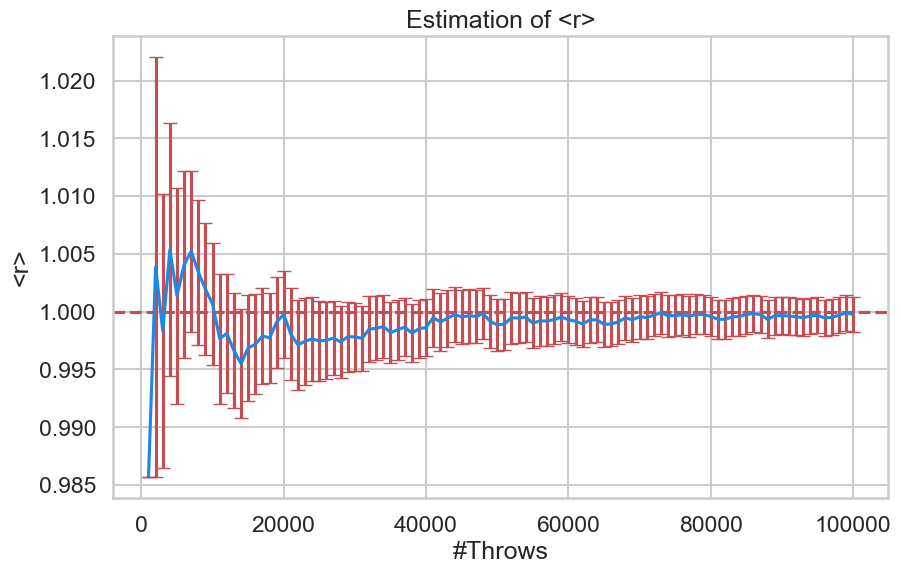

In [57]:
# Leggi i dati dal file
data = pd.read_csv('02.1/dataUniform.dat',sep=' ', header=None)

# Estrai le colonne
x = data[0]
y = data[1]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(1,figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color = '#1E88E5', ecolor='r', capsize=5)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('#Throws')
plt.ylabel('<r>')
plt.title('Estimation of <r>')
plt.grid(True)
plt.show()


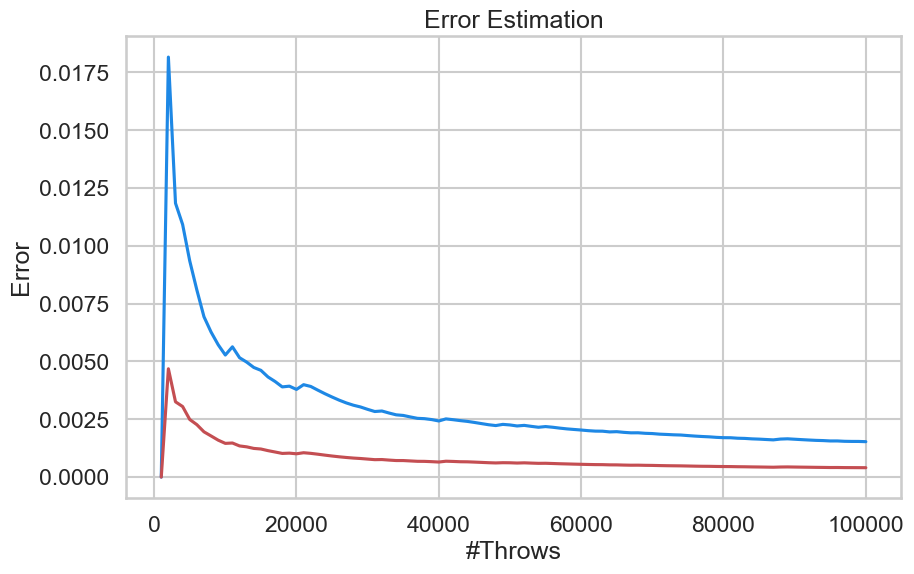

In [58]:
data = pd.read_csv('02.1/dataUniform.dat',sep=' ', header=None)
# Estrai le colonne
x = data[0]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(1,figsize=(10, 6))
plt.plot(x, yerr, color = '#1E88E5')
plt.xlabel('#Throws')
plt.ylabel('Error')
plt.title('Error Estimation')
plt.grid(True)

data1 = pd.read_csv('02.1/dataSampling.dat',sep=' ', header=None)

# Estrai le colonne
x1 = data1[0]
yerr1 = data1[2]

# Crea il grafico con barre di errore
plt.figure(1, figsize=(10, 6))
plt.plot(x1, yerr1, color = 'r')
plt.xlabel('#Throws')
plt.ylabel('Error')
plt.title('Error Estimation')
plt.grid(True)


Consideriamo la funzione di densità

$
f(x)=2-2x\quad \text{per } x\in[0,1],
$

la quale è una densità di probabilità, poiché

$
\int_0^1 (2-2x)\,dx = \Big[2x-x^2\Big]_0^1 = 2-1 = 1.
$

### 1. Calcolo della funzione cumulativa

La funzione cumulativa \(F(x)\) è data da

$
F(x)=\int_0^x (2-2t)\,dt.
$

Calcoliamo l'integrale:

$
F(x)=\left[2t-\;t^2\right]_0^x = 2x-x^2.
$

### 2. Calcolo della funzione inversa della cumulativa (quantile)

Per trovare la funzione inversa \(F^{-1}(p)\) risolviamo l'equazione

$
p=F(x)=2x-x^2,
$

ovvero

$
x^2-2x+p=0.
$

Trattandosi di un'equazione quadratica in \(x\), applichiamo la formula risolutiva:

$
x=\frac{2\pm\sqrt{4-4p}}{2} = 1\pm\sqrt{1-p}.
$

Osserviamo che, per \(p\in[0,1]\), la soluzione \(x=1+\sqrt{1-p}\) dà valori maggiori di 1, mentre quella corretta è

$
x=1-\sqrt{1-p}.
$

Pertanto, la funzione inversa della cumulativa (funzione quantile) è

$
\boxed{F^{-1}(p)=1-\sqrt{1-p}\quad\text{per } p\in[0,1].}
$

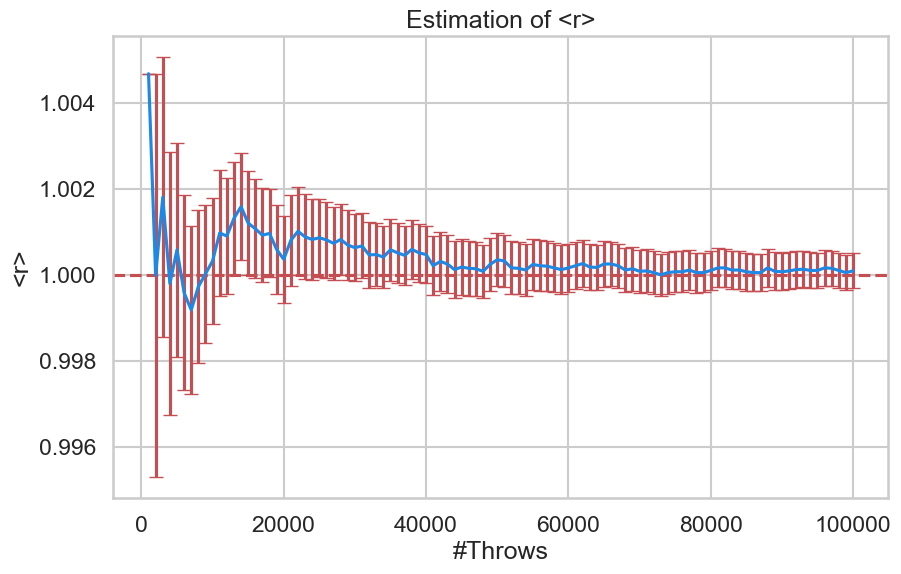

In [59]:
# Leggi i dati dal file
data = pd.read_csv('02.1/dataSampling.dat',sep=' ', header=None)

# Estrai le colonne
x = data[0]
y = data[1]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color = '#1E88E5', ecolor='r', capsize=5)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('#Throws')
plt.ylabel('<r>')
plt.title('Estimation of <r>')
plt.grid(True)
plt.show()

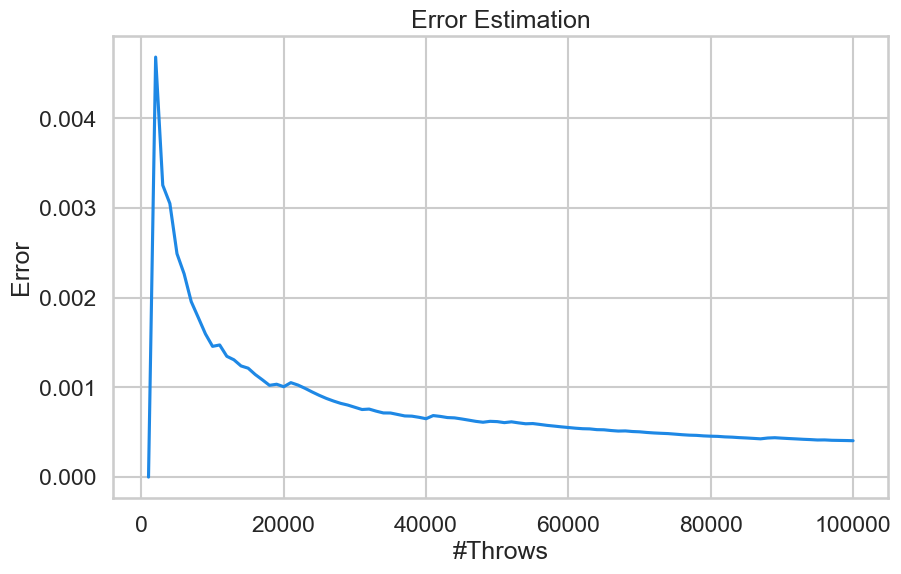

In [60]:
data = pd.read_csv('02.1/dataSampling.dat',sep=' ', header=None)

# Estrai le colonne
x = data[0]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(figsize=(10, 6))
plt.plot(x, yerr, color = '#1E88E5')
plt.xlabel('#Throws')
plt.ylabel('Error')
plt.title('Error Estimation')
plt.grid(True)
plt.show()

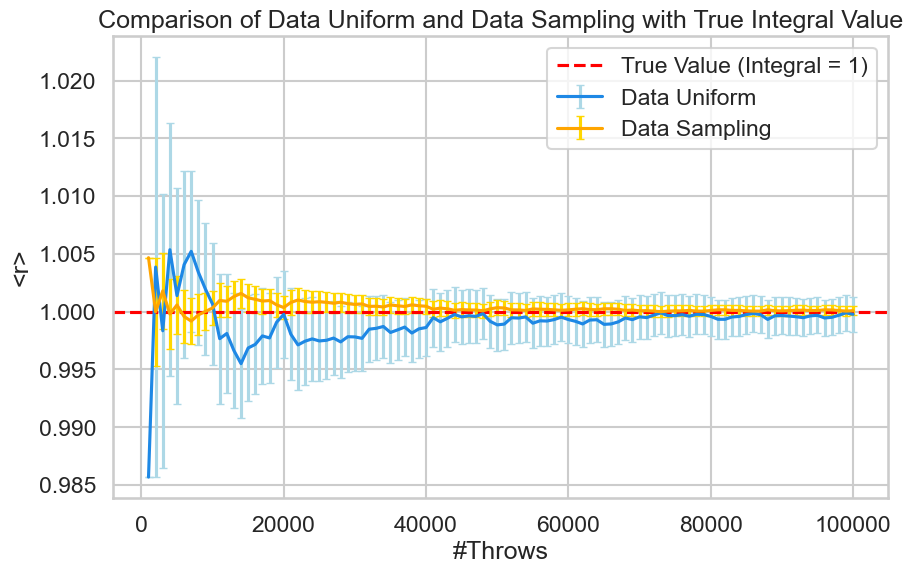

In [61]:
# Leggi i dati dai file
data_uniform = pd.read_csv('02.1/dataUniform.dat', sep=' ', header=None)
data_sampling = pd.read_csv('02.1/dataSampling.dat', sep=' ', header=None)

# Estrai le colonne per entrambi i dataset
x_uniform = data_uniform[0]
y_uniform = data_uniform[1]
yerr_uniform = data_uniform[2]

x_sampling = data_sampling[0]
y_sampling = data_sampling[1]
yerr_sampling = data_sampling[2]

# Crea il grafico
plt.figure(figsize=(10, 6))

# Grafico per dataUniform
plt.errorbar(x_uniform, y_uniform, yerr=yerr_uniform, label='Data Uniform', color='#1E88E5', ecolor='lightblue', capsize=3)

# Grafico per dataSampling
plt.errorbar(x_sampling, y_sampling, yerr=yerr_sampling, label='Data Sampling', color='orange', ecolor='gold', capsize=3)

# Linea orizzontale per il valore vero dell'integrale
plt.axhline(y=1, color='red', linestyle='--', label='True Value (Integral = 1)')

# Aggiungi etichette, titolo e legenda
plt.xlabel('#Throws')
plt.ylabel('<r>')
plt.title('Comparison of Data Uniform and Data Sampling with True Integral Value')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

# Esercizio 2.2

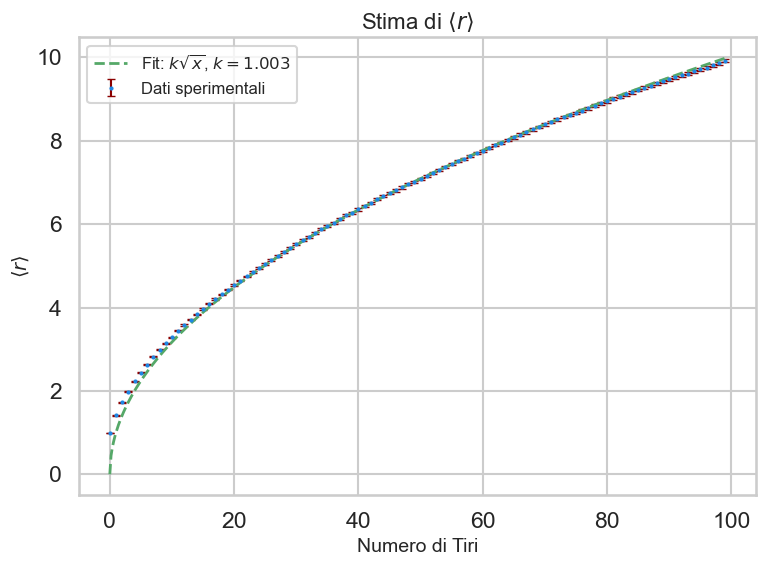

In [70]:
# Imposta lo stile di Seaborn per una grafica moderna e pulita
sns.set_theme(style="whitegrid", context="talk")

# Leggi i dati dal file, assegnando nomi alle colonne
data = pd.read_csv('02.2/discrete.dat', sep=' ', header=None, names=['Throws', 'r', 'r_err'])

# Estrai le colonne
x = data['Throws']
y = data['r']
yerr = data['r_err']

# Definizione della funzione di fit: k * sqrt(x)
def fit_func(x, k):
    return k * np.sqrt(x)

# Esegui il fit per ottenere il parametro ottimale
popt, pcov = curve_fit(fit_func, x, y)
k_opt = popt[0]

# Prepara la curva di fit
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = fit_func(x_fit, k_opt)

# Crea la figura con dimensioni adeguate
plt.figure(figsize=(8, 6))

# Plotta i dati con barre d'errore: marker circolari, colore blu e barre d'errore in rosso scuro
plt.errorbar(x, y, yerr=yerr, fmt='o', markersize=2, capsize=3, 
             label='Dati sperimentali', color='#1E88E5', ecolor='darkred', elinewidth=1.5)

# Plotta la curva di fit con linea tratteggiata verde
plt.plot(x_fit, y_fit, 'g--', linewidth=2, 
         label=f'Fit:'rf' $k \sqrt{{x}}$, $k = {k_opt:.3f}$')

# Aggiunge etichette agli assi e un titolo con una dimensione del font maggiore
plt.xlabel('Numero di Tiri', fontsize=14)
plt.ylabel(rf'$\langle r \rangle$', fontsize=14)
plt.title('Stima di 'rf'$\langle r \rangle$', fontsize=16)

# Aggiunge la legenda e applica un layout ottimizzato
plt.legend(fontsize=12)
plt.tight_layout()

# Visualizza il grafico
plt.show()

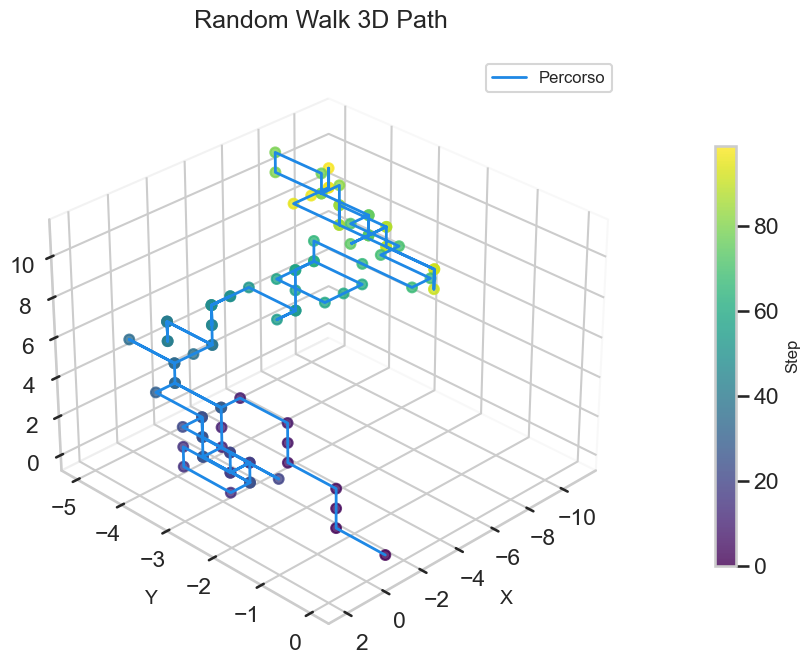

In [69]:
# Imposta lo stile moderno e pulito di Seaborn
sns.set_theme(style="whitegrid", context="talk")

# Leggi i dati dal file e assegna nomi alle colonne per chiarezza
data = pd.read_csv('02.2/discreteWalk.dat', sep=' ', header=None, names=['Step', 'X', 'Y', 'Z'])

# Estrai le coordinate
x = data['X']
y = data['Y']
z = data['Z']

# Crea la figura e il subplot 3D con dimensioni adeguate
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotta il percorso come linea continua
ax.plot(x, y, z, color='#1E88E5', lw=2, label='Percorso')

# Plotta i punti del percorso con un gradiente di colore in base al numero di step
sc = ax.scatter(x, y, z, c=np.arange(len(x)), cmap='viridis', s=50, alpha=0.8)

# Aggiungi una barra dei colori per indicare gli step
cbar = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.7)
cbar.set_label('Step', fontsize=12)

# Etichette e titolo con font adeguato e padding per una migliore leggibilità
ax.set_xlabel('X', labelpad=10, fontsize=14)
ax.set_ylabel('Y', labelpad=10, fontsize=14)
ax.set_zlabel('Z', labelpad=10, fontsize=14)
ax.set_title('Random Walk 3D Path', fontsize=18, pad=20)

# Imposta un angolo di visualizzazione ottimale
ax.view_init(elev=30, azim=45)

# Rimuovi il riempimento dei pannelli per un look più "open"
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Aggiungi la legenda e visualizza il grafico
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

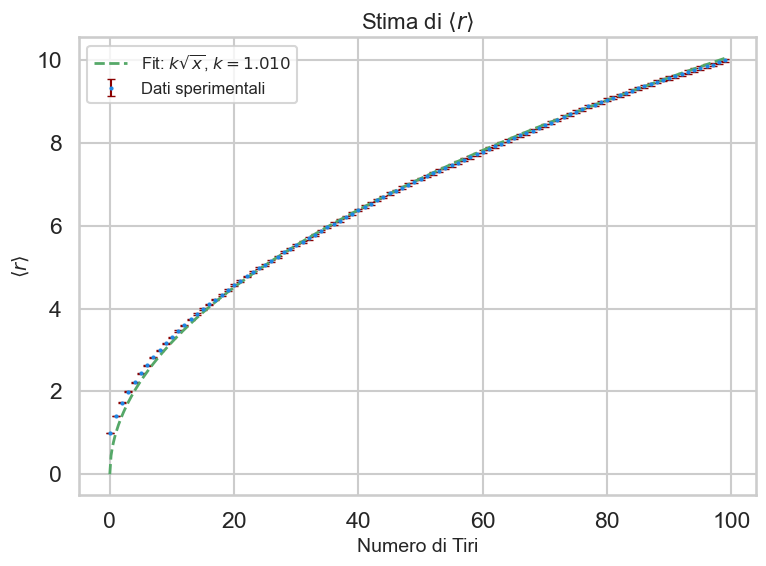

In [67]:
# Imposta lo stile di Seaborn per una grafica moderna e pulita
sns.set_theme(style="whitegrid", context="talk")

# Leggi i dati dal file, assegnando nomi alle colonne
data = pd.read_csv('02.2/continuous.dat', sep=' ', header=None, names=['Throws', 'r', 'r_err'])

# Estrai le colonne
x = data['Throws']
y = data['r']
yerr = data['r_err']

# Definizione della funzione di fit: k * sqrt(x)
def fit_func(x, k):
    return k * np.sqrt(x)

# Esegui il fit per ottenere il parametro ottimale
popt, pcov = curve_fit(fit_func, x, y)
k_opt = popt[0]

# Prepara la curva di fit
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = fit_func(x_fit, k_opt)

# Crea la figura con dimensioni adeguate
plt.figure(figsize=(8, 6))

# Plotta i dati con barre d'errore: marker circolari, colore blu e barre d'errore in rosso scuro
plt.errorbar(x, y, yerr=yerr, fmt='o', markersize=2, capsize=3, 
             label='Dati sperimentali', color='#1E88E5', ecolor='darkred', elinewidth=1.5)

# Plotta la curva di fit con linea tratteggiata verde
plt.plot(x_fit, y_fit, 'g--', linewidth=2, 
         label=f'Fit:'rf' $k \sqrt{{x}}$, $k = {k_opt:.3f}$')

# Aggiunge etichette agli assi e un titolo con una dimensione del font maggiore
plt.xlabel('Numero di Tiri', fontsize=14)
plt.ylabel(rf'$\langle r \rangle$', fontsize=14)
plt.title('Stima di 'rf'$\langle r \rangle$', fontsize=16)

# Aggiunge la legenda e applica un layout ottimizzato
plt.legend(fontsize=12)
plt.tight_layout()

# Visualizza il grafico
plt.show()

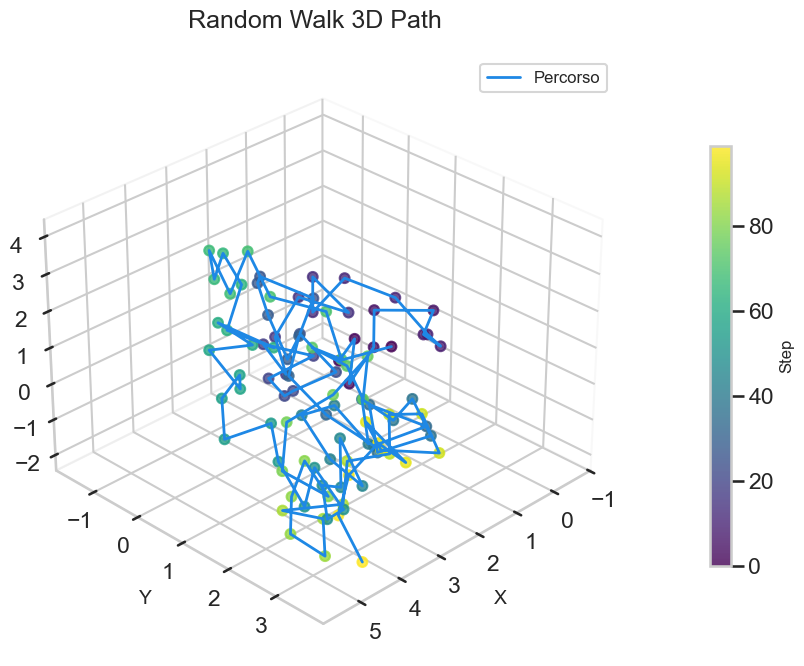

In [68]:
# Imposta lo stile moderno e pulito di Seaborn
sns.set_theme(style="whitegrid", context="talk")

# Leggi i dati dal file e assegna nomi alle colonne per chiarezza
data = pd.read_csv('02.2/continuousWalk.dat', sep=' ', header=None, names=['Step', 'X', 'Y', 'Z'])

# Estrai le coordinate
x = data['X']
y = data['Y']
z = data['Z']

# Crea la figura e il subplot 3D con dimensioni adeguate
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotta il percorso come linea continua
ax.plot(x, y, z, color='#1E88E5', lw=2, label='Percorso')

# Plotta i punti del percorso con un gradiente di colore in base al numero di step
sc = ax.scatter(x, y, z, c=np.arange(len(x)), cmap='viridis', s=50, alpha=0.8)

# Aggiungi una barra dei colori per indicare gli step
cbar = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.7)
cbar.set_label('Step', fontsize=12)

# Etichette e titolo con font adeguato e padding per una migliore leggibilità
ax.set_xlabel('X', labelpad=10, fontsize=14)
ax.set_ylabel('Y', labelpad=10, fontsize=14)
ax.set_zlabel('Z', labelpad=10, fontsize=14)
ax.set_title('Random Walk 3D Path', fontsize=18, pad=20)

# Imposta un angolo di visualizzazione ottimale
ax.view_init(elev=30, azim=45)

# Rimuovi il riempimento dei pannelli per un look più "open"
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Aggiungi la legenda e visualizza il grafico
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()